In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_train=pd.read_csv('Housing_dataset_train.csv')

In [7]:
df_test=pd.read_csv('Housing_dataset_test.csv')

In [8]:
df_train.head(5)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


<Axes: >

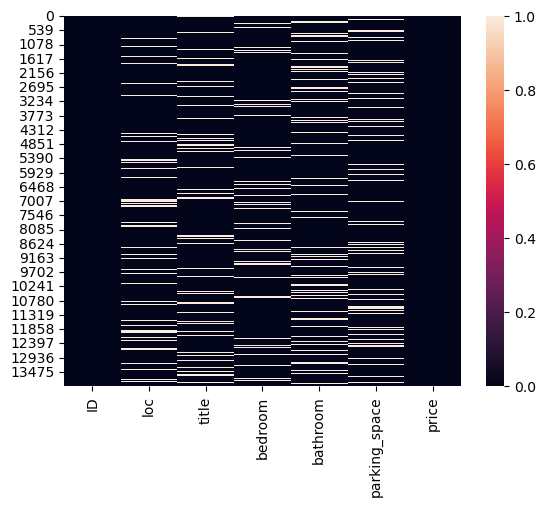

In [10]:
#visualizing the dataset for null value
sns.heatmap(df_train.isna())

In [11]:
#dealing with null rolls
df_train.dropna(subset=['loc'],inplace=True)
df_train.dropna(subset=['title'], inplace = True)

In [12]:
#replacing null values with their mean
df_train['bedroom'].fillna(value=df_train['bedroom'].mean(),inplace = True )
df_train['bathroom'].fillna(value=df_train['bathroom'].mean(),inplace = True)
df_train['parking_space'].fillna(value=df_train['parking_space'].mean(),inplace = True)

<Axes: >

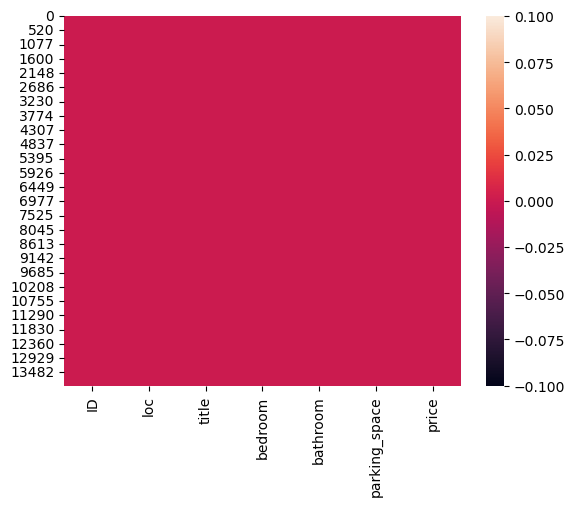

In [13]:
#visualizing if there is null in the dataset
sns.heatmap(df_train.isna())

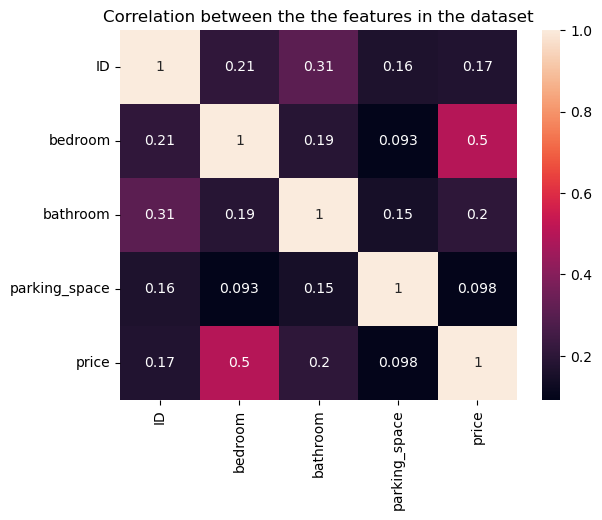

In [14]:
sns.heatmap(df_train.corr(), annot = True)
plt.title('Correlation between the the features in the dataset')
plt.savefig('cor.png')

In [11]:
#statical analysis in the dataset
df_train.describe().style.background_gradient()

,ID,bedroom,bathroom,parking_space,price
count,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000
mean,4868.685405,4.296861,3.131956,3.163883,2127766.862893
std,3815.291331,2.235145,1.861663,1.467406,1069676.448203
min,0.000000,1.000000,1.000000,1.000000,431967.290000
25%,1683.500000,3.000000,2.000000,2.000000,1391271.400500
50%,3536.000000,4.296861,3.000000,3.163883,1888006.166000
75%,8006.500000,5.000000,4.000000,4.000000,2571146.499500
max,12999.000000,9.000000,7.000000,6.000000,16568486.160000


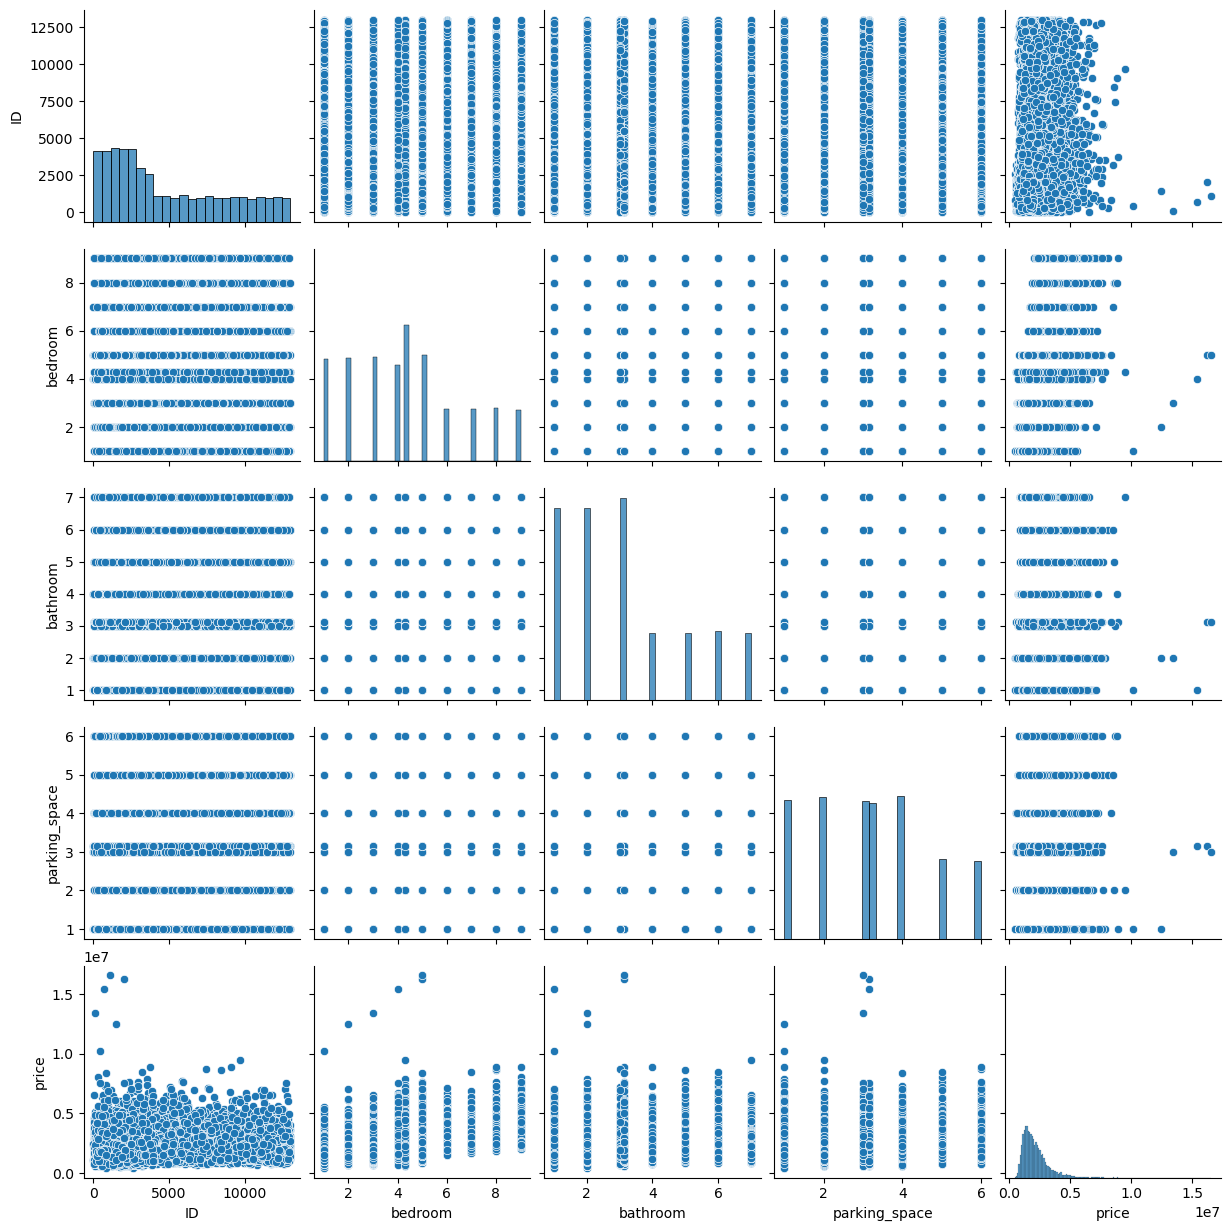

In [12]:
sns.pairplot(df_train)
#checking if the data is normarlly distributed

Text(0.5, 1.0, 'Averages Price for the cost of Houses')

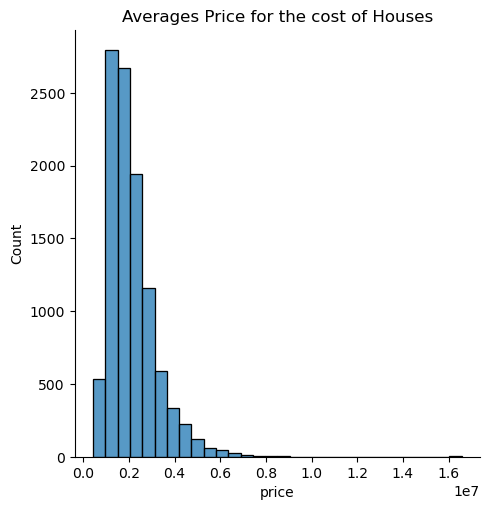

In [13]:
#checking the distribution of the price of house
sns.displot(df_train['price'],kde=False, bins=30)
plt.title('Averages Price for the cost of Houses' )

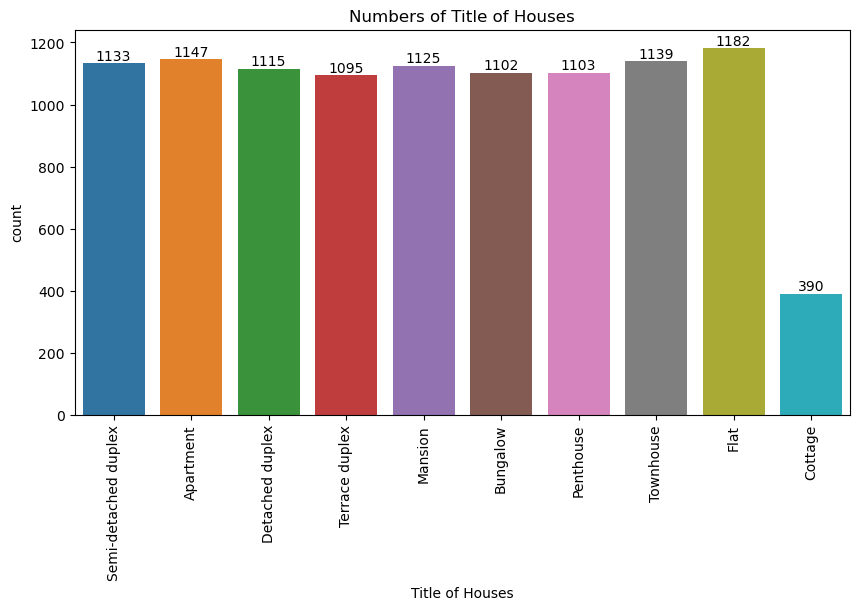

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_train, x=df_train['title'])
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation= 90)
plt.title('Numbers of Title of Houses')
plt.xlabel('Title of Houses')
plt.savefig('cor.png')

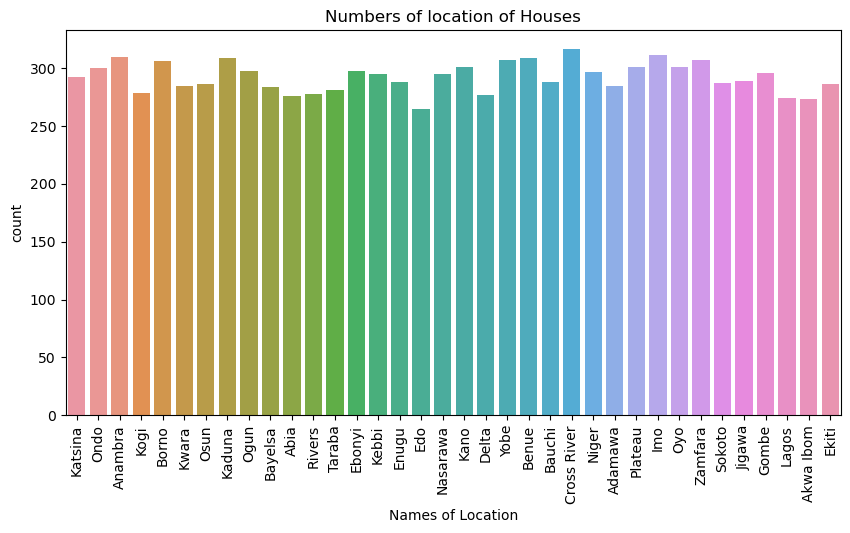

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_train, x=df_train['loc'])

plt.xticks(rotation= 90)
plt.title('Numbers of location of Houses')
plt.xlabel('Names of Location')
plt.savefig('cor.png')

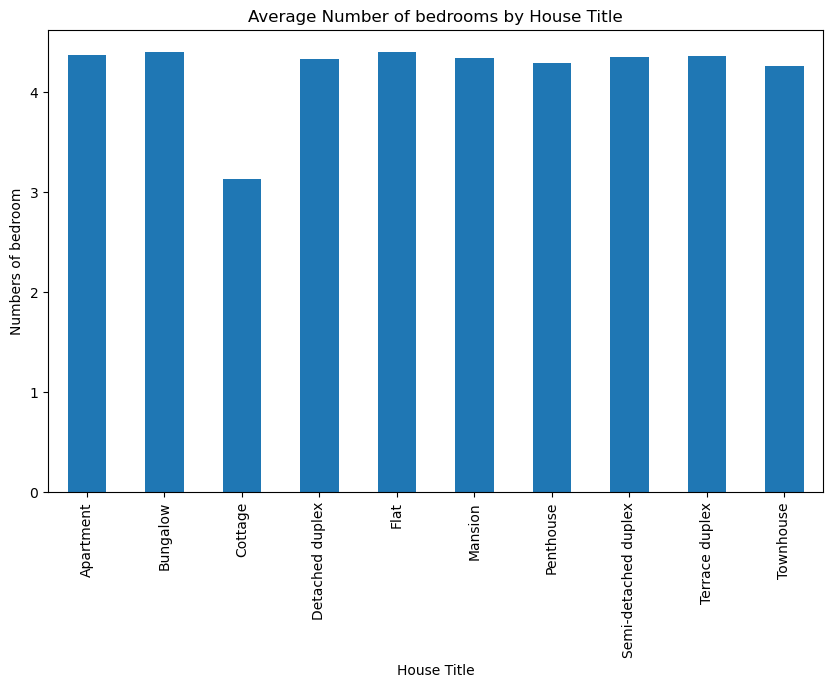

In [19]:
plt.figure(figsize=(10,6))
df_train[['title','loc','bathroom','parking_space', 'bedroom']].groupby('title')['bedroom'].mean().plot(kind='bar')
plt.ylabel('Numbers of bedroom')
plt.xlabel('House Title')
plt.title('Average Number of bedrooms by House Title')
plt.savefig('cor.png')

Text(0.5, 1.0, 'Average Number of bathrooms by House Title')

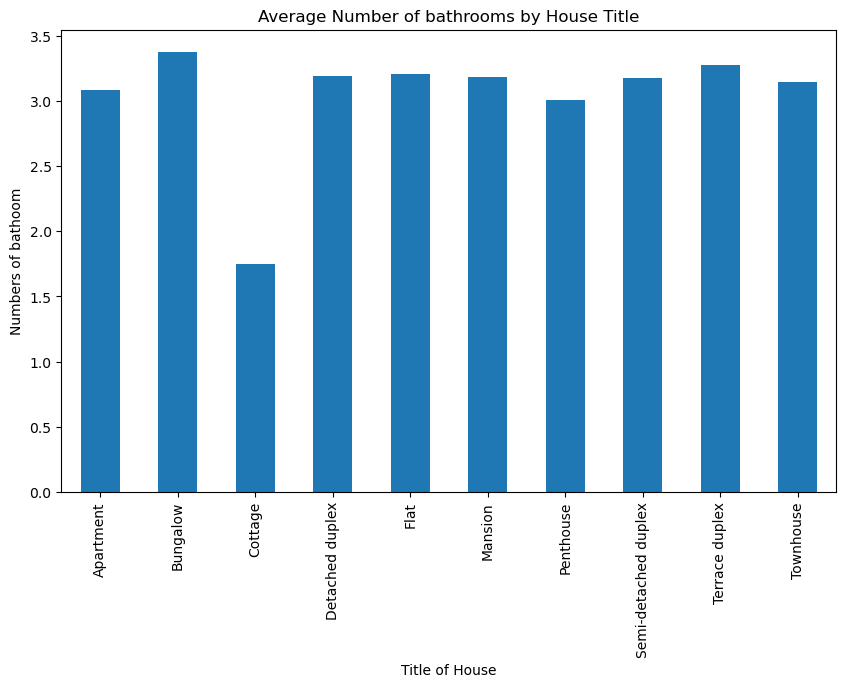

In [20]:
plt.figure(figsize=(10,6))
df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('title')['bathroom'].mean().plot(kind='bar')
plt.ylabel('Numbers of bathoom')
plt.xlabel('Title of House')
plt.title('Average Number of bathrooms by House Title')

Text(0.5, 1.0, 'Average Number of Parking space by House Title')

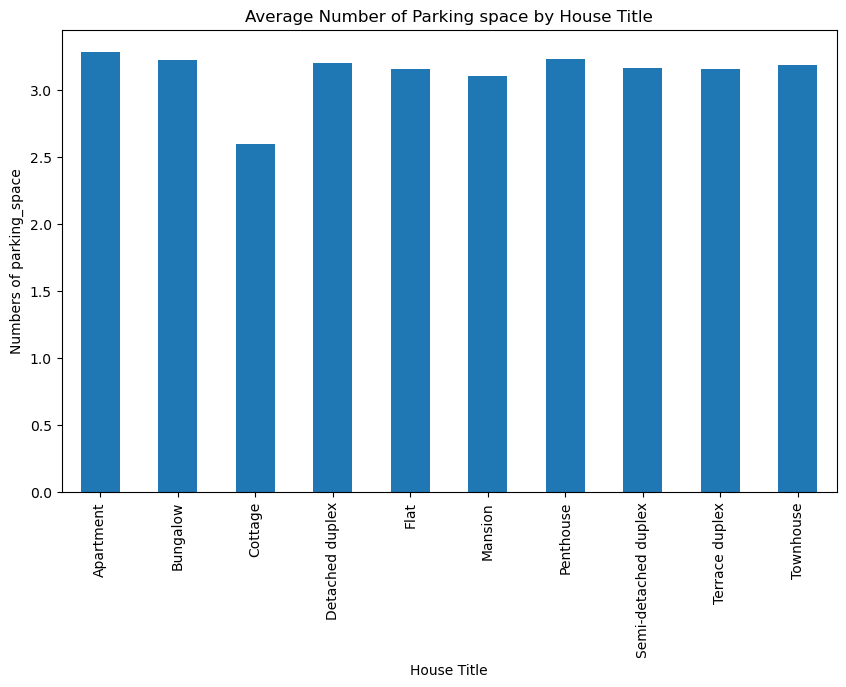

In [21]:
plt.figure(figsize=(10,6))
df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('title')['parking_space'].mean().plot(kind='bar')
plt.ylabel('Numbers of parking_space')
plt.xlabel('House Title')
plt.title('Average Number of Parking space by House Title')

In [21]:
#df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('loc')['bathroom'].mean()

Text(0.5, 1.0, 'Average Number of bathroom by House location')

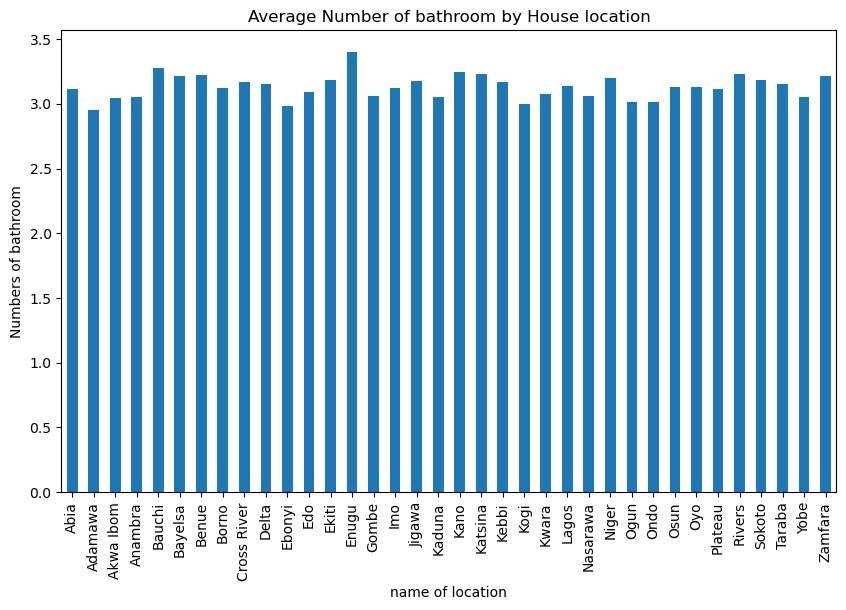

In [22]:
plt.figure(figsize=(10,6))
df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('loc')['bathroom'].mean().plot(kind='bar')
plt.ylabel('Numbers of bathroom')
plt.xlabel('name of location')
plt.title('Average Number of bathroom by House location')

Text(0.5, 1.0, 'Average Number of bedroom by House location')

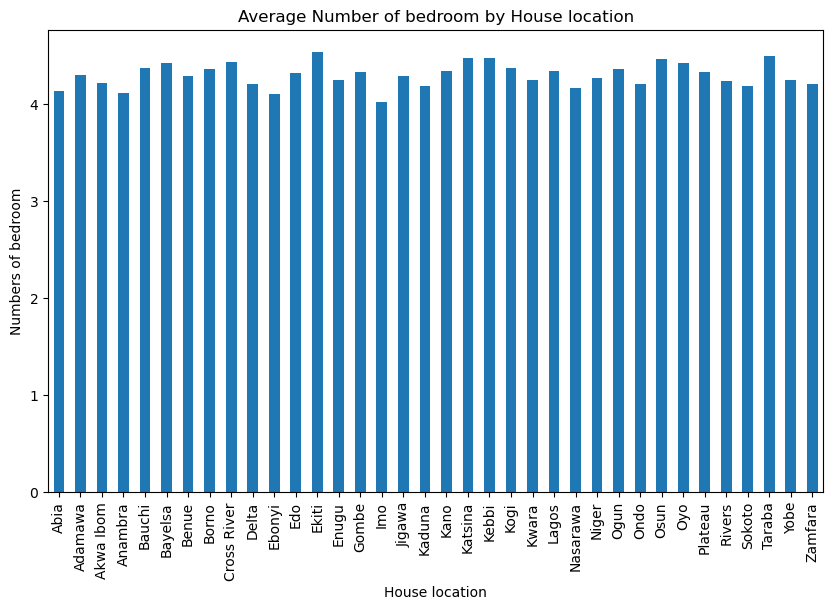

In [18]:
plt.figure(figsize=(10,6))
df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('loc')['bedroom'].mean().plot(kind='bar')
plt.ylabel('Numbers of bedroom')
plt.xlabel('House location')
plt.title('Average Number of bedroom by House location')

Text(0.5, 1.0, 'Average Number of Parking space by House location')

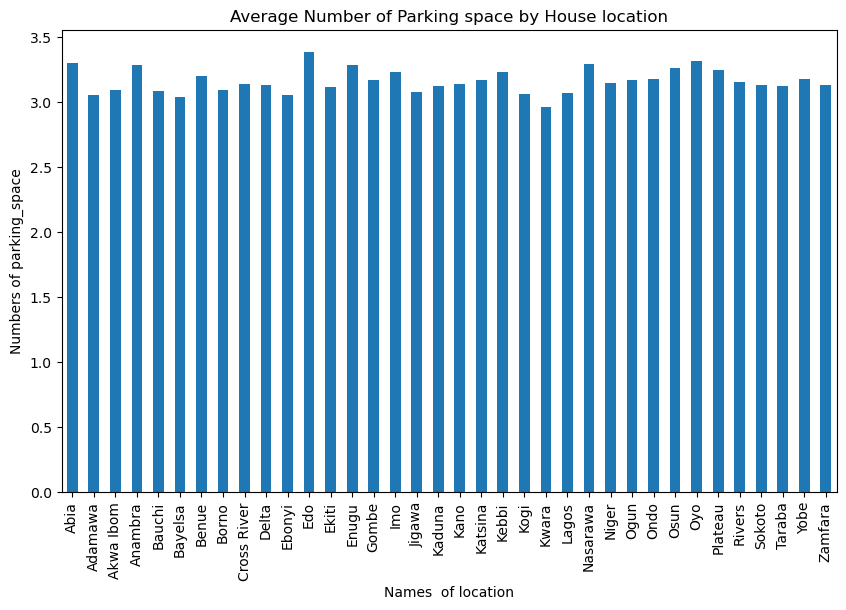

In [24]:
plt.figure(figsize=(10,6))
df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('loc')['parking_space'].mean().plot(kind='bar')
plt.ylabel('Numbers of parking_space')
plt.xlabel('Names  of location')
plt.title('Average Number of Parking space by House location')

Text(0.5, 1.0, 'Average Number of Parking space by House Title')

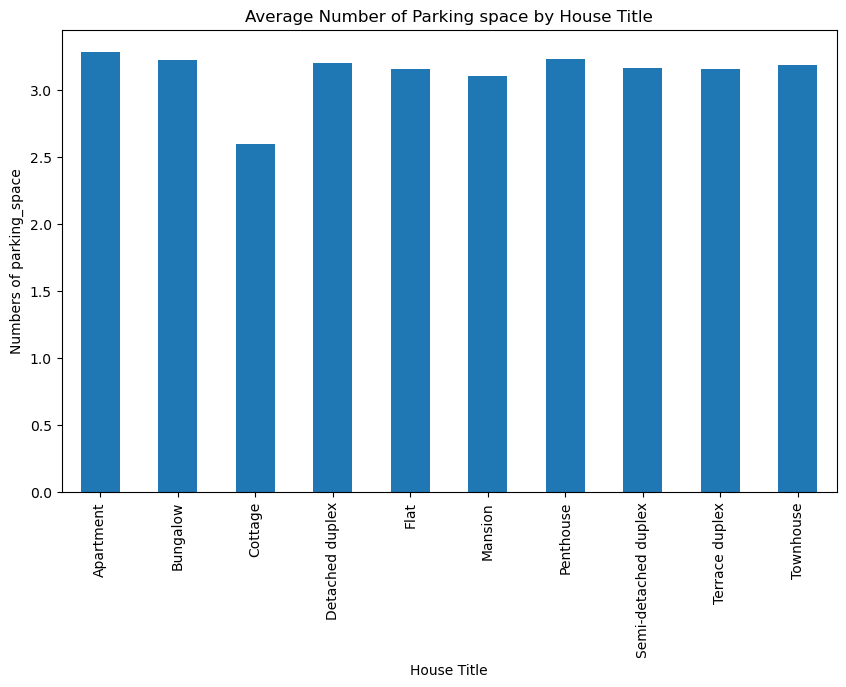

In [26]:
plt.figure(figsize=(10,6))
df_train[['title','bathroom','loc','parking_space', 'bedroom']].groupby('title')['parking_space'].mean().plot(kind='bar')
plt.ylabel('Numbers of parking_space')
plt.xlabel('House Title')
plt.title('Average Number of Parking space by House Title')

Text(0, 0.5, 'Prices of Houses')

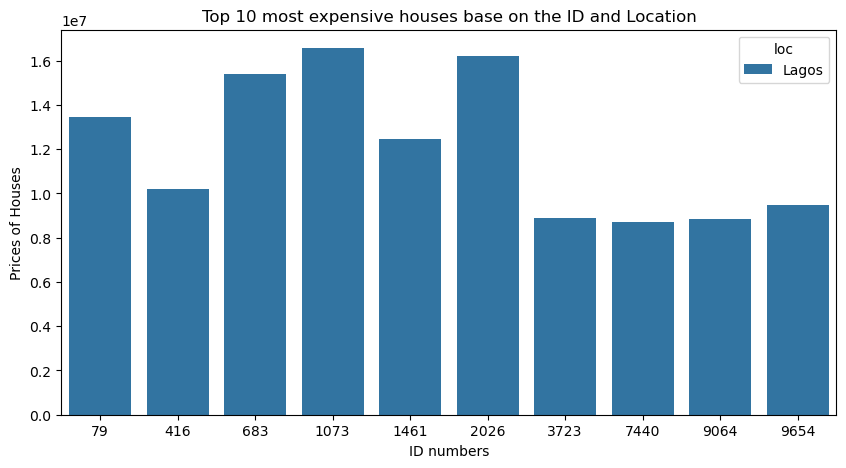

In [27]:
#Top 10 most expensive houses and location
top_10_prices = df_train[['ID','loc','title','parking_space','bedroom','bathroom','price']].nlargest(10,'price')
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_prices, x=top_10_prices['ID'], y=top_10_prices['price'], hue = top_10_prices['loc'])
plt.title('Top 10 most expensive houses base on the ID and Location')
plt.xlabel('ID numbers')
plt.ylabel('Prices of Houses')

In [16]:
bottom_10_prices = df_train[['ID','loc','title','parking_space','bedroom','bathroom','price']].nsmallest(10,'price')
bottom_10_prices 

,ID,loc,title,parking_space,bedroom,bathroom,price
4481,2606,Gombe,Cottage,1.000000,1.000000,2.000000,431967.2900
13538,847,Gombe,Cottage,1.000000,1.000000,1.000000,455591.2271
2759,1745,Gombe,Apartment,1.000000,1.000000,2.000000,552016.8649
13446,1229,Kebbi,Flat,4.000000,4.296861,1.000000,571676.1736
2099,1556,Kebbi,Bungalow,3.000000,1.000000,1.000000,580144.5733
12258,86,Kebbi,Flat,2.000000,1.000000,2.000000,582639.5902
6553,2147,Kebbi,Bungalow,2.000000,1.000000,3.131956,583817.7730
2050,3177,Kebbi,Flat,2.000000,1.000000,1.000000,586324.1395
535,441,Kebbi,Flat,3.163883,1.000000,1.000000,587975.7395
5748,458,Yobe,Cottage,1.000000,1.000000,3.131956,591032.1018


Text(0, 0.5, 'Price of house')

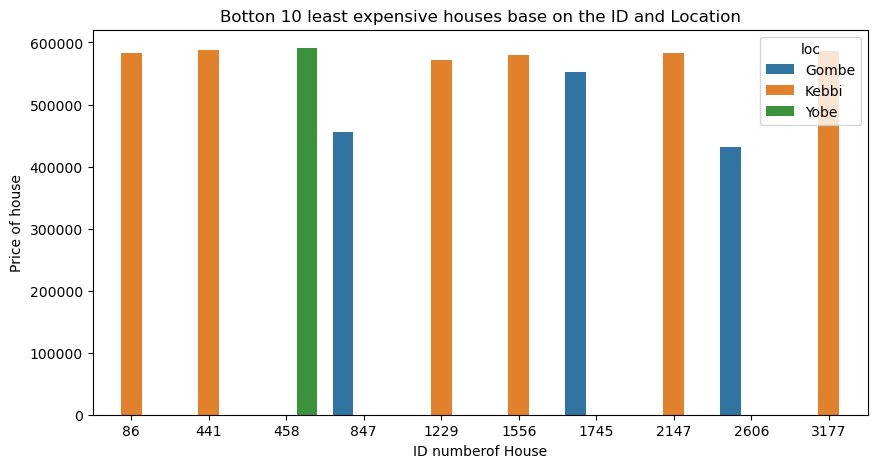

In [20]:
#botton 10 least expensive houses and location
bottom_10_prices = df_train[['ID','loc','title','parking_space','bedroom','bathroom','price']].nsmallest(10,'price')
plt.figure(figsize=(10,5))
sns.barplot(data=bottom_10_prices, x=bottom_10_prices['ID'], y=bottom_10_prices['price'], hue = bottom_10_prices['loc'])
plt.title('Botton 10 least expensive houses base on the ID and Location')
plt.xlabel('ID numberof House')
plt.ylabel('Price of house')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Katsina'),
  Text(1, 0, 'Ondo'),
  Text(2, 0, 'Anambra'),
  Text(3, 0, 'Kogi'),
  Text(4, 0, 'Borno'),
  Text(5, 0, 'Kwara'),
  Text(6, 0, 'Osun'),
  Text(7, 0, 'Kaduna'),
  Text(8, 0, 'Ogun'),
  Text(9, 0, 'Bayelsa'),
  Text(10, 0, 'Abia'),
  Text(11, 0, 'Rivers'),
  Text(12, 0, 'Taraba'),
  Text(13, 0, 'Ebonyi'),
  Text(14, 0, 'Kebbi'),
  Text(15, 0, 'Enugu'),
  Text(16, 0, 'Edo'),
  Text(17, 0, 'Nasarawa'),
  Text(18, 0, 'Kano'),
  Text(19, 0, 'Delta'),
  Text(20, 0, 'Yobe'),
  Text(21, 0, 'Benue'),
  Text(22, 0, 'Bauchi'),
  Text(23, 0, 'Cross River'),
  Text(24, 0, 'Niger'),
  Text(25, 0, 'Adamawa'),
  Text(26, 0, 'Plateau'),
  Text(27, 0, 'Imo'),
  Text(28, 0, 'Oyo'),
  Text(29, 0, 'Zamfara'),
  Text(30, 0, 'Sokoto'),
  Text(31, 0, 'Jigawa'),
  Text(32, 0, 'Gombe

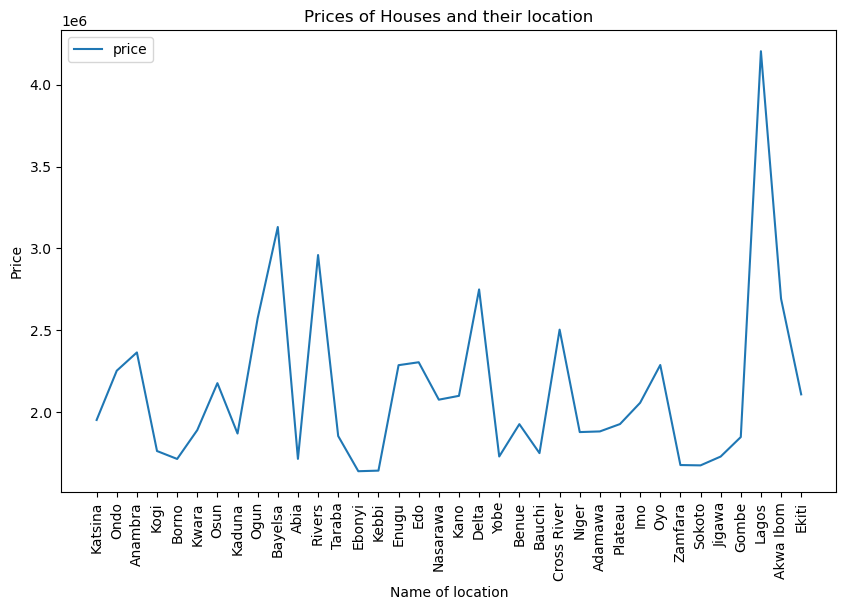

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x = df_train['loc'], y = df_train['price'], label = 'price', ci = None)
#sns.lineplot(x = df_train['loc'], y = df_train['bathroom'], label = 'bathroom')
#sns.lineplot(x = df_train['loc'], y = df_train['parking_space'], label = 'parking_space')
plt.title('Prices of Houses and their location')
plt.xlabel('Name of location')
plt.ylabel('Price')
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Semi-detached duplex'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Detached duplex'),
  Text(3, 0, 'Terrace duplex'),
  Text(4, 0, 'Mansion'),
  Text(5, 0, 'Bungalow'),
  Text(6, 0, 'Penthouse'),
  Text(7, 0, 'Townhouse'),
  Text(8, 0, 'Flat'),
  Text(9, 0, 'Cottage')])

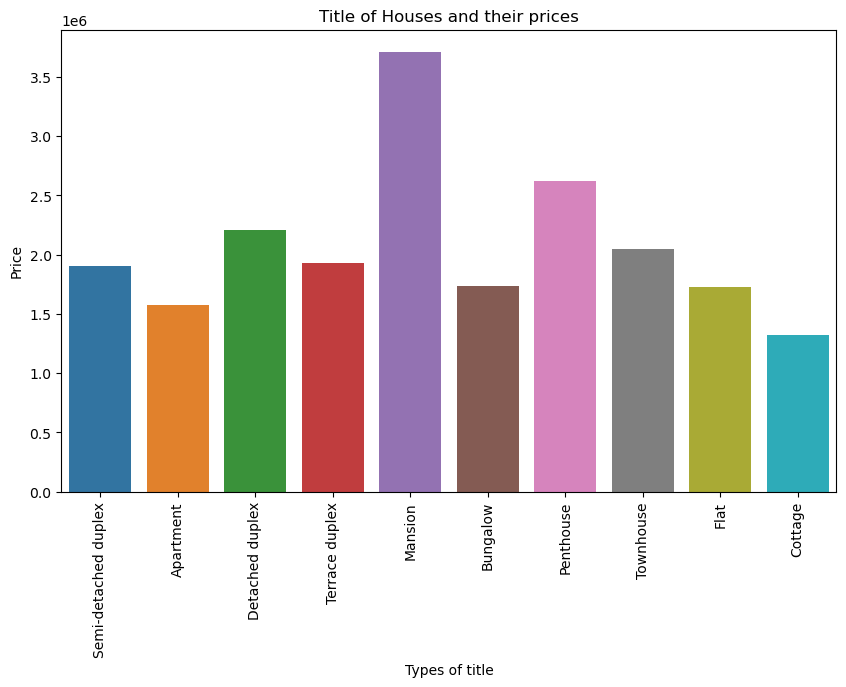

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_train, x = df_train['title'], y = df_train['price'], label = 'price', ci = None)
#sns.lineplot(x = df_train['loc'], y = df_train['bathroom'], label = 'bathroom')
#sns.lineplot(x = df_train['loc'], y = df_train['parking_space'], label = 'parking_space')
plt.title('Title of Houses and their prices')
plt.xlabel('Types of title')
plt.ylabel('Price')
plt.xticks(rotation= 90)

In [31]:
#df_train[['loc','price']].nlargest(10,'price').plot(kind='bar', figsize=(12,4))

### MACHINE LEARNING SECTION

it is important to restart the kernel before the machine learning section is run. This is because several iterations was made on the data in order to get the best RMSE value for the model. Some null rows was replace with the mean in the dataset whilw it  was remove in the dataset in  order to see how well the model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


df_train=pd.read_csv('Housing_dataset_train.csv')
df_test=pd.read_csv('Housing_dataset_test.csv')
df_train.head(5)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [2]:
#dealing with null rolls
df_train.dropna(subset=['loc'],inplace=True)
df_train.dropna(subset=['title'], inplace = True)
df_train.dropna(subset=['bedroom'], inplace = True)
df_train.dropna(subset =['parking_space'], inplace = True)
df_train.dropna(subset =['bathroom'], inplace = True)

In [3]:
df_train.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df_train['loc']= LabelEncoder.fit_transform(df_train['loc'])
df_train['title']= LabelEncoder.fit_transform(df_train['title'])
df_test['loc'] = LabelEncoder.fit_transform(df_test['loc'])
df_test['title']= LabelEncoder.fit_transform(df_test['title'])

In [5]:
X = df_train.iloc[:,1:6].values
y = df_train.iloc[:,6].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =scaler.fit_transform(X)

In [6]:
#Using RandomForestRegressor to fit the model
from sklearn.ensemble import RandomForestRegressor
Rf= RandomForestRegressor()
Rf.fit(X, y)
ypred1 = Rf.predict(X)
from sklearn.metrics import mean_squared_error
#yhat=(Rf.predict(X_test).reshape(-1, 1))
print('RMSE:' ,np.sqrt(mean_squared_error(y, ypred1, squared=False)) )

RMSE: 431.99493285699816


In [7]:
#uisng Xgboost Regressor to fit the model
import xgboost as xgb
xgb=xgb.XGBRegressor(max_depth = None, colsample_bylevel= None, colsample_bytree = 0.5, min_child_weight=15, n_estimators =150,
                     learning_rate=None)
xgb.fit(X, y)
ypred2 = xgb.predict(X)
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y, ypred2, squared=False)))

RMSE: 553.3562803933843


In [8]:
#uisng Linear Regressor to fit the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X, y)
# Predicting the Test set results
ypred3 = LR.predict(X)
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y, ypred3, squared=False)))
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

RMSE: 932.1242963126399


In [8]:
# Training the SVR model on the dataset
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X, y)
# Predicting the Test set results
ypred4 = svr.predict(X)
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y, ypred4, squared=False)))

RMSE: 1041.2495218714746


In [9]:
#uisng decisionTree Regressor to fit the model
from sklearn.tree import DecisionTreeRegressor
DT= DecisionTreeRegressor()
DT.fit(X, y)
# Predicting the Test set results
ypred5 = DT.predict(X)
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y, ypred5, squared=False)))
#np.set_printoptions(precision=2)

RMSE: 297.1289956477225


### Predicting Y for df_test

In [10]:
df_test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,18,6,4,1,2
1,1924,1,0,2,2,4
2,10718,1,1,2,7,2
3,12076,23,5,9,5,2
4,12254,14,7,5,6,1


In [11]:
X2=df_test.iloc[:,1:6].values

In [12]:
X2 =scaler.transform(X2)

In [13]:
ypred_X2= DT.predict(X2)

In [14]:
y2 =ypred_X2.astype(float)

In [15]:
#creating a dataframe for y2
ytest = pd.DataFrame(data=y2)
Result = pd.concat([df_test[["ID"]],ytest],axis=1)

In [16]:
Result['price'] = round(Result[0],2)
Result.drop([0],axis= 1, inplace= True)

In [17]:
Result

,ID,price
0,845,2450911.11
1,1924,1089608.71
2,10718,989327.30
3,12076,8593197.39
4,12254,1899956.29
...,...,...
5995,1594,1490591.19
5996,2416,1983489.71
5997,10195,1998032.09
5998,9455,2124078.33


In [39]:
Result.to_csv('Result.csv', index = False)